# WeatherPy
## Analyis 
Base on the charts and graphs above, following are my observations: 
1. The farther from the equator, the lower the maximum temperature. This trend matches with the data and correlation between the lattitude and the max temperature of all cicties regrdless of which hemisphere they belong to. For example, Canary Islands (28.0000) has a greater latitude than Hargeisa (9.5600). This measn Canary Islands is farther from the equator line (lattitude = 0) than Hargeisa. Canary Islands (71.56) also has lower maximum temperature than Hargeisa (75.02). Among the cities in the Couthern hemisphere, CapeTown (-33.9258) is also farther from the equator than Tocache(-8.1842); it (56.10) also has much lower maxmum temperature than Tocache (90.59). 
2. There is a very weak relationship between latitudes and the humidity for all cities regardless of which hemisphere they belong to. The correlation number between the lattitudes and the humidity of the northenrn hemishphere is quite small: 0.002. The regressline is y = 0.0x + 69.97, which means the latitude does not help matter regarding to the prediction of the humidity of a city. The scatter plot also shows a wide range of data across the coordinating grid, in which some cities has a very close or almost the latitude could have totally different humidity. 
3. The scatter plot and regresstion line of the latitudes and the cloudiness of the Northern hemisphere also show there is no relation between them. The scatter has a wide range of data accross and the corelation is also small 0.035. However, the scatter plot of the latitudes and the cloudiness of the Southern hemisphere shows a more obvious trend. The corellation between latitudes and cloudiness of Southern hemisphere is 0.24444. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = url + "appid=" + weather_api_key +"&units=imperial"+"&q=" 

In [4]:
# Checking the city_reponse with a city and get the key names: "Lat", "Lon", "Max Temp", "Cloudiness", "Humidity",
# "Wind Speed", "Country", and "Date"
city_response = requests.get(query_url + "London").json()
print(city_response)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 70.18, 'feels_like': 69.71, 'temp_min': 66.85, 'temp_max': 73.99, 'pressure': 1021, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1661707610, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1661663198, 'sunset': 1661713043}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [5]:
# Dictionary to store all data needed for the cities in the API response 
city_data = {"City": [],
              "Lat": [],
              "Lon": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
             "Country": [],
             "Date": [] }
# Define variables for the cities count and set (of 50)
city_count = 0
city_set = 1

In [7]:
print("Beginning Data Retrieval")
print("-----------------------------")
# loops for creating dataframe columns      
for city in cities:
    city_count = city_count + 1
    if city_count > 50:
        city_count = 1
        city_set = city_set + 1
    print(f"Processing Record {city_count} of Set {city_set} | {city}")
    try:
        city_response = requests.get(query_url + city).json()
        city_data['City'].append(city_response['name'])
        city_data['Lat'].append(city_response['coord']['lat'])
        city_data['Lon'].append(city_response['coord']['lon'])
        city_data['Max Temp'].append(city_response['main']['temp_max'])
        city_data['Humidity'].append(city_response['main']['humidity'])
        city_data['Cloudiness'].append(city_response['clouds']['all'])
        city_data['Wind Speed'].append(city_response['wind']['speed'])
        city_data['Country'].append(city_response['sys']['country'])
        city_data['Date'].append(city_response['dt'])
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | hargeysa
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | canaries
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | souillac
Processing Record 10 of Set 1 | thinadhoo
Processing Record 11 of Set 1 | vondrozo
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | hobyo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | puerto escondido
Processing Record 19 of Set 1 | alamosa
Processing Record 20 of Set 1 | olafsvik
Processing Record 21 of Set 1 | t

Processing Record 40 of Set 4 | srednekolymsk
Processing Record 41 of Set 4 | balakhninskiy
Processing Record 42 of Set 4 | muros
Processing Record 43 of Set 4 | nara
Processing Record 44 of Set 4 | xichang
Processing Record 45 of Set 4 | lingao
Processing Record 46 of Set 4 | patacamaya
Processing Record 47 of Set 4 | jambi
Processing Record 48 of Set 4 | saint george
Processing Record 49 of Set 4 | cherskiy
Processing Record 50 of Set 4 | qaanaaq
Processing Record 1 of Set 5 | tuggurt
City not found. Skipping...
Processing Record 2 of Set 5 | auch
Processing Record 3 of Set 5 | angra
City not found. Skipping...
Processing Record 4 of Set 5 | aksu
Processing Record 5 of Set 5 | new norfolk
Processing Record 6 of Set 5 | colon
Processing Record 7 of Set 5 | jamestown
Processing Record 8 of Set 5 | anito
Processing Record 9 of Set 5 | port lincoln
Processing Record 10 of Set 5 | marcona
City not found. Skipping...
Processing Record 11 of Set 5 | road town
Processing Record 12 of Set 5 |

Processing Record 31 of Set 8 | boden
Processing Record 32 of Set 8 | karabulak
Processing Record 33 of Set 8 | jinchengjiang
City not found. Skipping...
Processing Record 34 of Set 8 | lubango
Processing Record 35 of Set 8 | hervey bay
Processing Record 36 of Set 8 | quang ngai
Processing Record 37 of Set 8 | aljezur
Processing Record 38 of Set 8 | batsfjord
Processing Record 39 of Set 8 | wajid
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | pekan
Processing Record 42 of Set 8 | nokaneng
Processing Record 43 of Set 8 | padang
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | sisimiut
Processing Record 46 of Set 8 | lahij
Processing Record 47 of Set 8 | itoman
Processing Record 48 of Set 8 | torbay
Processing Record 49 of Set 8 | remiremont
Processing Record 50 of Set 8 | san lucas
Processing Record 1 of Set 9 | emerald
Processing Record 2 of Set 9 | ilhabela
Processing Record 3 of Set 9 | tumannyy
City not found. Skipping...
P

Processing Record 15 of Set 12 | kupang
Processing Record 16 of Set 12 | labuhan
Processing Record 17 of Set 12 | longlac
City not found. Skipping...
Processing Record 18 of Set 12 | jalingo
Processing Record 19 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 12 | klaksvik
Processing Record 21 of Set 12 | trincomalee
Processing Record 22 of Set 12 | vanimo
Processing Record 23 of Set 12 | khor
Processing Record 24 of Set 12 | bako
Processing Record 25 of Set 12 | svetlaya
Processing Record 26 of Set 12 | cordoba
Processing Record 27 of Set 12 | pilibhit
Processing Record 28 of Set 12 | gzhatsk
City not found. Skipping...
Processing Record 29 of Set 12 | fare
Processing Record 30 of Set 12 | stephenville
Processing Record 31 of Set 12 | sambava
Processing Record 32 of Set 12 | wilmington
Processing Record 33 of Set 12 | watrous
Processing Record 34 of Set 12 | jatiroto
Processing Record 35 of Set 12 | axim
Processing Record 36 of Set 12 | matamoros
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Display the DataFrame
cities_df = pd.DataFrame(city_data)
cities_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,56.10,61,20,5.75,ZA,1661708397
1,Hargeisa,9.5600,44.0650,75.02,50,75,15.79,SO,1661708397
2,Canary Islands,28.0000,-15.5000,71.56,50,20,27.63,ES,1661708398
3,Pangnirtung,66.1451,-65.7125,50.00,57,75,9.22,CA,1661708398
4,Tuktoyaktuk,69.4541,-133.0374,42.80,93,100,5.75,CA,1661708399


In [9]:
#Describe the DataFrame 
cities_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.417615,17.553442,69.236010,69.350604,54.215889,8.041606,1.661709e+09
std,33.212311,89.863409,14.415888,21.119524,37.807059,5.114361,1.430737e+02
min,-54.800000,-179.166700,33.780000,9.000000,0.000000,0.000000,1.661708e+09
25%,-7.613200,-62.935500,57.910000,57.500000,17.500000,4.160000,1.661708e+09
50%,22.816700,25.511200,71.650000,74.000000,60.000000,7.070000,1.661709e+09
75%,48.897300,92.688350,79.485000,86.000000,93.000000,11.140000,1.661709e+09
max,78.218600,178.416700,104.070000,100.000000,100.000000,27.630000,1.661709e+09


In [10]:
# Export the city data into a csv file 
cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Display if there is any cities that have humidity > 100 
high_humidity = cities_df.loc[cities_df["Humidity"] > 100]
high_humidity
# I will skip this step since there is no city has more than 100% humidity 

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

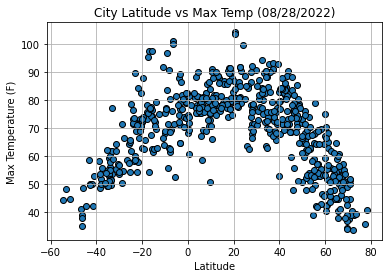

In [33]:
#Plot Lattitudes vs. Max Temp of all cities
cities_lat = cities_df['Lat']
cities_max_temp = cities_df['Max Temp']
plt.scatter(cities_lat, cities_max_temp, marker="o", edgecolors="black")
plt.title("City Latitude vs Max Temp (08/28/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig('Latitude vs Temp.png')
plt.show()

## Latitude vs. Humidity Plot

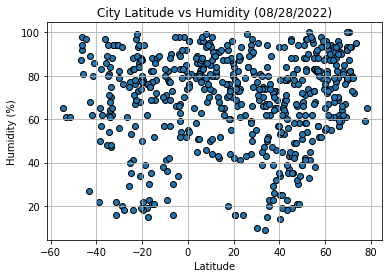

In [36]:
#Plot Lattitudes vs. Humidity of all cities
cities_humidity = cities_df['Humidity']
plt.scatter(cities_lat, cities_humidity, marker="o", edgecolors="black")
plt.title("City Latitude vs Humidity (08/28/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('Latitude vs Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

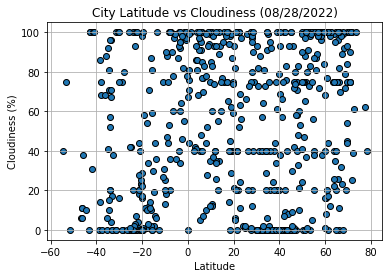

In [37]:
#Plot Lattitudes vs. Cloudiness of all cities
cities_clouds = cities_df['Cloudiness']
plt.scatter(cities_lat, cities_clouds, marker="o", edgecolors="black")
plt.title("City Latitude vs Cloudiness (08/28/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig('Latitude vs Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

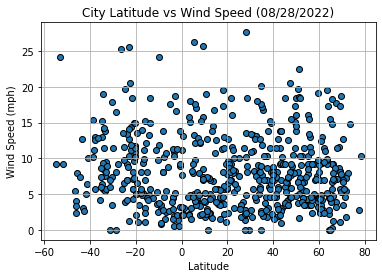

In [38]:
#Plot Lattitudes vs. Wind Speed of all cities
cities_wind = cities_df['Wind Speed']
plt.scatter(cities_lat, cities_wind, marker="o", edgecolors="black")
plt.title("City Latitude vs Wind Speed (08/28/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig('Latitude vs Wind Speed.png')
plt.show()

## Linear Regression

In [17]:
# Display only Northen hemisphere cities 
Nothern_hemisphere = cities_df.loc[cities_df["Lat"] >= 0]
Nothern_hemisphere

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Hargeisa,9.5600,44.0650,75.02,50,75,15.79,SO,1661708397
2,Canary Islands,28.0000,-15.5000,71.56,50,20,27.63,ES,1661708398
3,Pangnirtung,66.1451,-65.7125,50.00,57,75,9.22,CA,1661708398
4,Tuktoyaktuk,69.4541,-133.0374,42.80,93,100,5.75,CA,1661708399
5,Kapaa,22.0752,-159.3190,77.32,82,20,16.11,US,1661708398
...,...,...,...,...,...,...,...,...,...
573,Vozhega,60.4725,40.2213,66.49,56,8,4.36,RU,1661708836
574,Price,39.5994,-110.8107,79.12,35,0,6.91,US,1661708836
576,Manavālakurichi,8.1333,77.3000,77.20,86,28,12.33,IN,1661708837
577,Arzgir,45.3728,44.2206,78.31,35,2,18.43,RU,1661708838


In [18]:
# Display only Southern hemisphere cities 
Southern_hemisphere = cities_df.loc[cities_df['Lat'] < 0]
Southern_hemisphere

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,56.10,61,20,5.75,ZA,1661708397
6,Souillac,-20.5167,57.5167,70.45,88,23,10.27,MU,1661708400
8,Vondrozo,-22.8167,47.2833,58.55,97,7,1.28,MG,1661708401
10,Mataura,-46.1927,168.8643,35.04,98,11,2.37,NZ,1661708402
12,Rikitea,-23.1203,-134.9692,72.18,76,100,25.52,PF,1661708346
...,...,...,...,...,...,...,...,...,...
563,Pareora,-44.4871,171.2132,42.19,97,10,7.43,NZ,1661708831
564,Mildura,-34.2000,142.1500,55.08,68,57,18.95,AU,1661708831
567,Batemans Bay,-35.7167,150.1833,54.10,86,88,4.16,AU,1661708566
572,Yulara,-25.2406,130.9889,54.37,40,1,9.71,AU,1661708835


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.7088761911144338


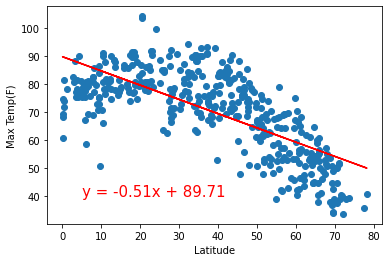

In [50]:
# Nothern Hemisphere: Max Temp vs. Lattitude 
north_lat = Nothern_hemisphere['Lat']
north_max_temp = Nothern_hemisphere['Max Temp']
correlation = st.pearsonr(north_lat, north_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(5, 40), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Northern Hemisphere -Temperature (F) vs.Latitude.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.7355174089262515
The r value is 0.7355174089262513


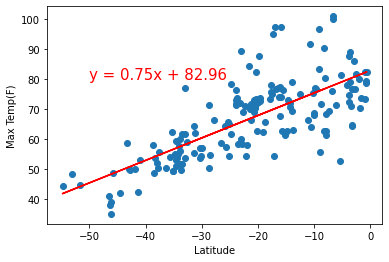

In [49]:
# Southern Hemisphere: Max Temp vs. Lattitude 
south_lat = Southern_hemisphere['Lat']
south_max_temp = Southern_hemisphere['Max Temp']
correlation = st.pearsonr(south_lat, south_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50, 80), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp(F)')
print(f"The correlation between both factors is {correlation[0]
plt.savefig('Southern Hemisphere -Temperature (F) vs.Latitude.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.002500084344219432


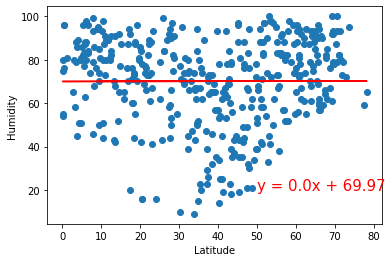

In [41]:
#Nothern Hemisphere: Humidity vs. Lattitude 
north_humidity = Nothern_hemisphere['Humidity']
correlation = st.pearsonr(north_lat, north_humidity)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_humidity)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.021233308376501083


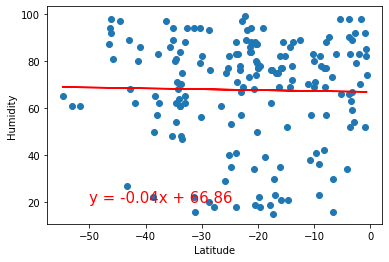

In [46]:
#Southern Hemisphere: Humidity vs. Lattitude 
south_humidity = Southern_hemisphere['Humidity']
correlation = st.pearsonr(south_lat, south_humidity)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_humidity)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.03522927225835795


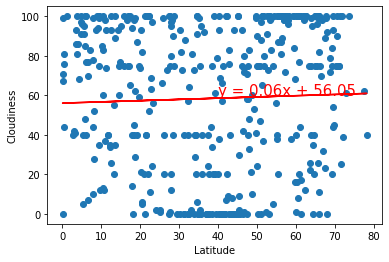

In [42]:
#Nothern Hemisphere: Cloudiness vs. Lattitude 
north_cloud = Nothern_hemisphere['Cloudiness']
correlation = st.pearsonr(north_lat, north_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_cloud)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(40, 60), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.24449562355295842


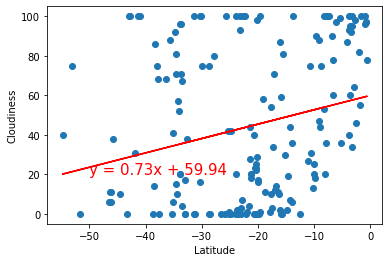

In [43]:
#Southern Hemisphere: Cloudiness vs. Lattitude 
south_cloud = Southern_hemisphere['Cloudiness']
correlation = st.pearsonr(south_lat, south_cloud)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_cloud)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-50, 20), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.0042158231138807265


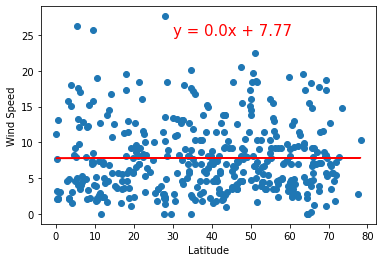

In [44]:
#Nothern Hemisphere: Wind Speed vs. Lattitude 
north_wind = Nothern_hemisphere['Wind Speed']
correlation = st.pearsonr(north_lat, north_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat,north_wind)
plt.plot(north_lat,regress_values,"r-")
plt.annotate(line_eq,(30, 25), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Northern Hemisphere - Wind Speed(mph) vs. Latitude.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.1460788038329405


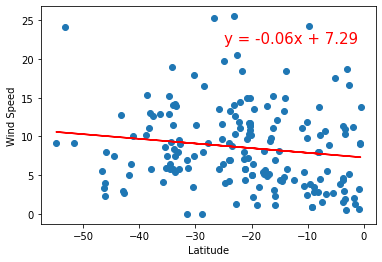

In [51]:
#Nothern Hemisphere: Wind Speed vs. Lattitude
south_wind = Southern_hemisphere['Wind Speed']
correlation = st.pearsonr(south_lat, south_wind)
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat,south_wind)
plt.plot(south_lat,regress_values,"r-")
plt.annotate(line_eq,(-25, 22), fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The correlation between both factors is {correlation[0]}")
plt.savefig('Southern Hemisphere - Wind Speed(mph) vs. Latitude.png')
plt.show()